# Useful Imports

In [ ]:
import pandas as pd
import re
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# cloud run time - reading dataframes
df = pd.read_table("train_en.tsv")
dev = pd.read_table("dev_en.tsv")
test = pd.read_table("test_en.tsv")

In [ ]:
test = pd.read_table("test_en.tsv")
columns = ["id", "text", "HS", "TS", "AG"]
data = np.concatenate([[test.columns], test.values])
# concatenating them into one
test_set = pd.DataFrame(data, columns = columns)
test = test_set

In [ ]:
df

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0
...,...,...,...,...,...
8995,9196,@mmdwriter @JRubinBlogger @BenSasse I am proud...,0,0,0
8996,9197,@CheriJacobus Hollywood is complicit in the ra...,0,0,0
8997,9198,@amaziah_filani What a fucking cunt I hate see...,1,1,1
8998,9199,Hysterical woman like @CoryBooker,0,0,0


In [ ]:
dev

,id,text,HS,TR,AG
0,18201,I swear I’m getting to places just in the nick...,0,0,0
1,18202,I’m an immigrant — and Trump is right on immig...,0,0,0
2,18203,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,0,1
3,18204,@DRUDGE_REPORT We have our own invasion issues...,1,0,1
4,18205,Worker Charged With Sexually Molesting Eight C...,0,0,0
...,...,...,...,...,...
995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,0,0
996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1,1,1
997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0,0,0
998,19199,I hate bitches who talk about niggaz with kids...,1,0,1


In [ ]:
test

,id,text,HS,TS,AG
0,31568,"Bro is a bitch, fucking cunt https://t.co/dQ8J...",0,0.1,0.2
1,30734,I'm rewatching Breaking Bad & I could see why ...,1,1,0
2,31227,@charliekirk11 @asia742 364 down only about 12...,0,0,0
3,31224,>Harasses women and calls them bitch and crabb...,0,0,0
4,31139,"Bitch you ain't gotta call my phone, matter fa...",0,0,0
...,...,...,...,...,...
2966,34170,Fanna start traveling bitch. Haha you hoes can...,1,1,0
2967,33757,"Do something about this immediately, @realDona...",1,0,1
2968,34470,If I trick a bitch and let her think I'm Obama...,1,0,1
2969,33014,#stopimmigration#banislam#Merkelmussweg #FuckE...,1,0,1


# Data Analysis

## Statistics

distribution

In [ ]:
def distribution_hs(df) -> None:
 labels = df["HS"]
 print(labels.value_counts())

distribution_hs(test)

0    1718
1    1252
0       1
Name: HS, dtype: int64


In [ ]:
def quantify_rows(df):
  print(len(df))

quantify_rows(EDA)

2970


### Concatenate train and dev set

In [ ]:
def concatenate_tweets(df1, df2):
  return pd.concat([df1, df2], ignore_index = True)

EDA = concatenate_tweets(df, dev)

In [ ]:
EDA

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0
...,...,...,...,...,...
9995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,0,0
9996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1,1,1
9997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0,0,0
9998,19199,I hate bitches who talk about niggaz with kids...,1,0,1


In [ ]:
# code to check for any missing values
EDA.isnull().values.any()

False

### Distribution of labels

In [ ]:
def find_distribution(df):
  """ (HS, TR, AG) """
  annotation_dictionary = dict()
  for index, row in df.iterrows():
    annotation = (row['HS'], row['TR'], row['AG'])
    if not annotation in annotation_dictionary:
      annotation_dictionary[annotation] = 1
    else:
      annotation_dictionary[annotation] += 1
  return annotation_dictionary

find_distribution(EDA)

{(1, 0, 0): 1463,
 (0, 0, 0): 5790,
 (1, 0, 1): 1187,
 (1, 1, 1): 576,
 (1, 1, 0): 984}

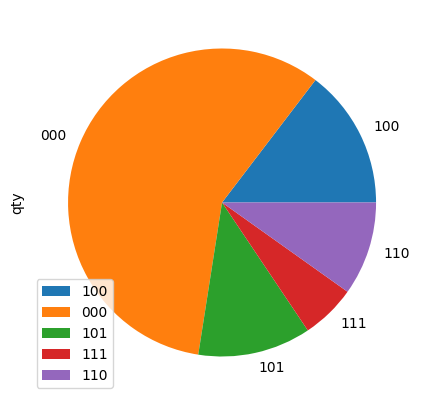

In [ ]:
def piegraph():
  df = pd.DataFrame({'qty': [1463, 5790, 1187, 576, 984]},
                  index=['100', '000', '101', '111', '110'])
  df.plot.pie(y='qty', figsize=(5, 5))

piegraph()

### Full corpus

In [ ]:
def obtain_full_corpus(data):
  full_corpus = " "
  for index, row in data.iterrows():
   full_corpus += row["text"]
  return full_corpus

full_corpus = obtain_full_corpus(EDA)

In [ ]:
full_corpus

' Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNikeWhy would young fighting age men be the vast majority of the ones escaping a war &amp; not those who cannot fight like women, children, and the elderly?It\'s because the majority of the refugees are not actually refugees they are economic migrants trying to get into Europe.... https://t.co/Ks0SHbtYqn@KamalaHarris Illegals Dump their Kids at the border like Road Kill and Refuse to Unite! They Hope they get Amnesty, Free Education and Welfare Illegal #FamilesBelongTogether in their Country not on the Taxpayer Dime Its a SCAM #NoDACA #NoAmnesty #SendTheNY Times: \'Nearly All White\' States Pose \'an Array of Problems\' for Immigrants https://t.co/ACZKLhdMV9 https://t.co/CJAlSXCzR6Orban in Brussels: European leaders are ignoring the will of the people, they do not want migrants https://t.co/NeYFyqvYlX@KurtSchlichter LEGAL is. Not illegal. #BuildThatWall@RitaPanahi @826

In [ ]:
type(full_corpus)

str

In [ ]:
def obtain_full_corpus_HS(data):
  corpus = " "
  for index, row in data.iterrows():
    if row['HS'] == 1:
      corpus += row["text"]
  return corpus

corpus_HS = obtain_full_corpus_HS(EDA)

In [ ]:
corpus_HS

' Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNikeWhy would young fighting age men be the vast majority of the ones escaping a war &amp; not those who cannot fight like women, children, and the elderly?It\'s because the majority of the refugees are not actually refugees they are economic migrants trying to get into Europe.... https://t.co/Ks0SHbtYqn@KamalaHarris Illegals Dump their Kids at the border like Road Kill and Refuse to Unite! They Hope they get Amnesty, Free Education and Welfare Illegal #FamilesBelongTogether in their Country not on the Taxpayer Dime Its a SCAM #NoDACA #NoAmnesty #SendThe@KurtSchlichter LEGAL is. Not illegal. #BuildThatWall@RealDonaldTrump @HouseGOP Illegals are dumping their kids heres o they can get  welfare, aid and U.S School  Ripping off U.S Taxpayers  #SendThemBack !  Stop Alowing illegals to Abuse the Taxpayer #Immigration https://t.co/rItfeGcB5R via @BreitbartNewsLithuania, Roma

In [ ]:
def obtain_full_corpus_noHS(data):
  corpus = " "
  for index, row in data.iterrows():
    if row['HS'] == 0:
      corpus += row["text"]
  return corpus

corpus_noHS = obtain_full_corpus_noHS(EDA)

In [ ]:
corpus_noHS

' NY Times: \'Nearly All White\' States Pose \'an Array of Problems\' for Immigrants https://t.co/ACZKLhdMV9 https://t.co/CJAlSXCzR6Orban in Brussels: European leaders are ignoring the will of the people, they do not want migrants https://t.co/NeYFyqvYlX@RitaPanahi @826Maureen @RealCandaceO Antifa are just a pack of druggie misfits that no one loves, being the violent thugs they are is their cry for attention and their hit of self importance.#JuvenileDelinquentsEx-Teacher Pleads Not guilty To Rape Charges https://t.co/D2mGu3VT5Gstill places on our Bengali (Sylheti) class! it\'s London\'s 2nd language! know anyone interested @SBSisters @refugeecouncil @DocsNotCops https://t.co/sOx6shjvMxDFID Africa Regional Profile: July 2018 https://t.co/npfZCriW0wWatch: Benjamin Netanyahu backs Trump\'s decision to cut aid to the Palestinians and UNRWA - Free Speech Time - https://t.co/SB843Zf0IF @ISupport_IsraelWhile Costa Rica has received the most asylum claims, Panama, Mexico and the USA have also

### Common Words

In [ ]:
# common words in hateful tweets
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# find top 5 most common words
def most_common_words_HS(datas):
  full_corpus = ''
  for index, row in datas[datas["HS"] == 1].iterrows():
    full_corpus += row["text"]
  # remove stop words
  split_it = full_corpus.split()
  # cleaning
  nosw = [w for w in split_it if not w in stop_words]
  nosw = [w for w in nosw if not w in punctuation]
  nosw = [w for w in nosw if not w in ['I', 'Like', 'like', 'i', 'get', 'want', 'You']]
  # Pass the split_it list to instance of Counter class.
  Counters_found = Counter(nosw)
  most_occur = Counters_found.most_common(20)
  print(most_occur)
  #return full_corpus

most_common_words_HS(EDA)

[('bitch', 586), ('women', 325), ('illegal', 227), ('#BuildThatWall', 202), ('ass', 200), ('refugees', 196), ('fuck', 188), ('fucking', 188), ('The', 181), ('woman', 181), ('go', 178), ('u', 173), ('people', 170), ('migrants', 168), ('#MAGA', 168), ('cunt', 166), ('whore', 163), ('would', 151), ('need', 142), ('back', 141)]


In [ ]:
# No Hate Speech

# find top 5 most common words
def most_common_words_NoHS(datas):
  full_corpus = ''
  for index, row in datas[datas["HS"] == 0].iterrows():
    full_corpus += row["text"]
  # remove stop words
  split_it = full_corpus.split()
  # cleaning
  nosw = [w for w in split_it if not w in stop_words]
  nosw = [w for w in nosw if not w in punctuation]
  nosw = [w for w in nosw if not w in ['I', 'Like', 'like', 'i', 'get', 'want', 'You']]
  # Pass the split_it list to instance of Counter class.
  Counters_found = Counter(nosw)
  most_occur = Counters_found.most_common(20)
  print(most_occur)
  #return full_corpus

most_common_words_NoHS(EDA)

[('immigrant', 440), ('refugees', 427), ('women', 422), ('migrants', 278), ('woman', 261), ('men', 253), ('&amp;', 238), ('people', 238), ('rape', 229), ('refugee', 209), ('The', 195), ('via', 194), ('one', 180), ('go', 175), ('immigration', 152), ('know', 151), ('bitch', 147), ('migrant', 146), ('make', 144), ('new', 137)]


In [ ]:
# overall

# find top 5 most common words
def most_common_words(datas):
  # this actually counts the number of occurence of the word 'bitch' and does not pick up on 'yassbitch'
  full_corpus = ''
  for index, row in datas.iterrows():
    full_corpus += row["text"]
  # remove stop words
  split_it = full_corpus.split()
  # cleaning
  nosw = [w for w in split_it if not w in stop_words]
  nosw = [w for w in nosw if not w in punctuation]
  nosw = [w for w in nosw if not w in ['I', 'Like', 'like', 'i', 'get', 'want', 'You']]
  # Pass the split_it list to instance of Counter class.
  Counters_found = Counter(nosw)
  most_occur = Counters_found.most_common(20)
  print(most_occur)
  #return full_corpus

most_common_words(EDA)

[('women', 747), ('bitch', 733), ('refugees', 623), ('immigrant', 502), ('migrants', 446), ('woman', 442), ('people', 408), ('The', 377), ('rape', 362), ('go', 353), ('&amp;', 347), ('illegal', 343), ('men', 332), ('via', 310), ('one', 305), ('fucking', 305), ('fuck', 301), ('immigration', 287), ('know', 285), ('ass', 280)]


### Common Mentions

In [ ]:
# overall
def quantify_mentions(corpus: str) -> int:
  # this is to find all the mentions
  mention_d = dict()
  mentions = re.findall(r'@\S+\b', corpus)
  #print(mentions)
  for instance in mentions:
    if not instance in mention_d:
      mention_d[instance] = 1
    else:
      mention_d[instance] += 1
  print(sorted(mention_d.values())[-5:])
  print(sorted(mention_d, key=mention_d.get)[-5:])
  #return {k: v for k, v in sorted(mention_d.items(), key=lambda item: item[1])}

quantify_mentions(full_corpus)

[33, 52, 67, 84, 263]
['@FoxNews', '@Refugees', '@POTUS', '@AnnCoulter', '@realDonaldTrump']


In [ ]:
def quantify_mentions_noHS(corpus: str) -> int:
  # this is to find all the mentions
  mention_d = dict()
  mentions = re.findall(r'@\S+\b', corpus)
  #print(mentions)
  for instance in mentions:
    if not instance in mention_d:
      mention_d[instance] = 1
    else:
      mention_d[instance] += 1
  print(sorted(mention_d.values())[-5:])
  print(sorted(mention_d, key=mention_d.get)[-5:])
  #return {k: v for k, v in sorted(mention_d.items(), key=lambda item: item[1])}

quantify_mentions_noHS(corpus_noHS)

[25, 29, 32, 51, 77]
['@AnnCoulter', '@UNHCR_Kenya', '@tyrusmaina', '@Refugees', '@realDonaldTrump']


In [ ]:
def quantify_mentions_HS(corpus: str) -> int:
  # this is to find all the mentions
  mention_d = dict()
  mentions = re.findall(r'@\S+\b', corpus)
  #print(mentions)
  for instance in mentions:
    if not instance in mention_d:
      mention_d[instance] = 1
    else:
      mention_d[instance] += 1
  print(sorted(mention_d.values())[-5:])
  print(sorted(mention_d, key=mention_d.get)[-5:])
  #return {k: v for k, v in sorted(mention_d.items(), key=lambda item: item[1])}

quantify_mentions_HS(corpus_HS)

[26, 27, 55, 58, 185]
['@potus', '@HouseGOP', '@POTUS', '@AnnCoulter', '@realDonaldTrump']


### Common Hashtags

In [ ]:
# overall - in both hate speech and non hatespeech
def quantify_hashtags(corpus: str) -> int:
  hashtag_d = dict()
  # this is to find all the hashtags
  hashtags = re.findall(r'#[^# ]+', corpus)
  # finding common hashtags
  for instance in hashtags:
    if not instance in hashtag_d:
      hashtag_d[instance] = 1
    else:
      hashtag_d[instance] += 1
  print(sorted(hashtag_d.values())[-5:])
  print(sorted(hashtag_d, key=hashtag_d.get)[-5:])

quantify_hashtags(full_corpus)

[110, 146, 203, 229, 264]
['#NoDACA', '#Trump', '#BuildTheWall', '#MAGA', '#BuildThatWall']


In [ ]:
def quantify_hashtags_noHS(corpus: str) -> int:
  hashtag_d = dict()
  # this is to find all the hashtags
  hashtags = re.findall(r'#[^# ]+', corpus)
  # finding common hashtags
  for instance in hashtags:
    if not instance in hashtag_d:
      hashtag_d[instance] = 1
    else:
      hashtag_d[instance] += 1
  print(sorted(hashtag_d.values())[-5:])
  print(sorted(hashtag_d, key=hashtag_d.get)[-5:])

quantify_hashtags_noHS(corpus_noHS)

[34, 35, 38, 39, 50]
['#Immigration', '#Trump', '#Rohingya', '#WithRefugees', '#refugees']


In [ ]:
def quantify_hashtags_HS(corpus: str) -> int:
  hashtag_d = dict()
  # this is to find all the hashtags
  hashtags = re.findall(r'#[^# ]+', corpus)
  # finding common hashtags
  for instance in hashtags:
    if not instance in hashtag_d:
      hashtag_d[instance] = 1
    else:
      hashtag_d[instance] += 1
  print(sorted(hashtag_d.values())[-5:])
  print(sorted(hashtag_d, key=hashtag_d.get)[-5:])

quantify_hashtags_HS(corpus_HS)

[108, 111, 189, 202, 260]
['#NoDACA', '#Trump', '#BuildTheWall', '#MAGA', '#BuildThatWall']


### Find Annotation of Strings

In [ ]:
# finding what annotation these 5 words have - this is per tweets
def find_annotation(word:str, datas):
  """ (HS, TR, AG) """
  annotation_dictionary = dict()
  occurences = 0  # number of tweets this comes into
  for index, row in datas.iterrows():
    if word in row['text']:
      occurences += 1
      annotation = (row['HS'], row['TR'], row['AG'])
      if not annotation in annotation_dictionary:
        annotation_dictionary[annotation] = 1
      else:
        annotation_dictionary[annotation] += 1
  return (annotation_dictionary, occurences)

# train set
print(find_annotation('bitch', df))

({(1, 1, 1): 172, (1, 0, 1): 46, (1, 1, 0): 353, (0, 0, 0): 189, (1, 0, 0): 148}, 908)


In [ ]:
# top 3 words with their labels
print(find_annotation('women', EDA))
print(find_annotation('bitch', EDA))
print(find_annotation('refugees', EDA))

({(1, 0, 0): 204, (0, 0, 0): 443, (1, 0, 1): 62, (1, 1, 0): 65, (1, 1, 1): 23}, 797)
({(1, 1, 1): 211, (1, 0, 1): 47, (1, 1, 0): 378, (0, 0, 0): 213, (1, 0, 0): 150}, 999)
({(1, 0, 0): 132, (1, 0, 1): 125, (0, 0, 0): 617, (1, 1, 0): 5, (1, 1, 1): 4}, 883)


In [ ]:
# Quantifying the number of occurences of each word in the full corpus of tweets
print(full_corpus.count('refugees'), full_corpus.count('bitch'), full_corpus.count('women'))

976 1072 886


In [ ]:
# top 3 mentions quantise with labels
print(find_annotation('@POTUS', EDA))
print(find_annotation('@AnnCoulter', EDA))
print(find_annotation('@realDonaldTrump', EDA))

({(1, 0, 1): 31, (0, 0, 0): 12, (1, 1, 1): 4, (1, 0, 0): 23, (1, 1, 0): 4}, 74)
({(1, 0, 1): 6, (0, 0, 0): 25, (1, 0, 0): 4, (1, 1, 0): 43, (1, 1, 1): 10}, 88)
({(1, 0, 0): 73, (0, 0, 0): 79, (1, 0, 1): 104, (1, 1, 1): 14, (1, 1, 0): 14}, 284)


In [ ]:
# total number of occurences of the three most common mentions in the full corpus
print(full_corpus.count('@POTUS'), full_corpus.count('@AnnCoulter'), full_corpus.count('@realDonaldTrump'))

75 88 290


In [ ]:
# top 3 hashtags with their labels
print(find_annotation('#BuildThatWall', EDA))
print(find_annotation('#MAGA', EDA))
print(find_annotation('#BuildTheWall', EDA))


({(1, 0, 0): 112, (1, 0, 1): 218, (1, 1, 1): 10, (1, 1, 0): 6}, 346)
({(1, 0, 1): 138, (1, 0, 0): 80, (0, 0, 0): 31, (1, 1, 1): 11, (1, 1, 0): 5}, 265)
({(1, 0, 0): 70, (1, 0, 1): 133, (1, 1, 1): 9, (0, 0, 0): 15, (1, 1, 0): 7}, 234)


In [ ]:
# total number of occurences of Hashtag in the full corpus
print(full_corpus.count('#BuildThatWall'), full_corpus.count('#MAGA'), full_corpus.count('#BuildTheWall'))

386 269 244


### Plotting / Graphing

Some ideas for graphing:

We can make a Bar / Pie graph for the counts of different emojis.

We can make a Bar / Pie graph for the counts of the different stem words / Lemmatised words

Other type of graphs?

<Axes: title={'center': 'Distribution of labels'}, ylabel='qty'>

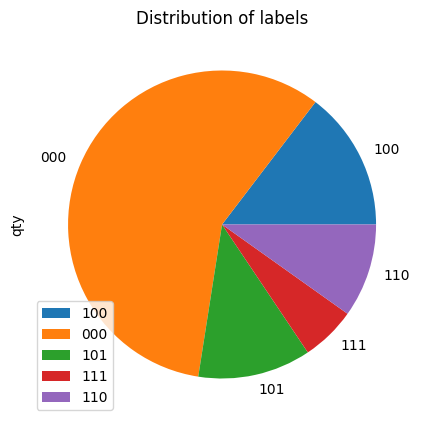

In [ ]:
# piegraph of distributions
def piegraph():
  df = pd.DataFrame({'qty': [1463, 5790, 1187, 576, 984]},
                  index=['100', '000', '101', '111', '110'])
  ax = df.plot.pie(y='qty', figsize=(5, 5))
  ax.set_title('Distribution of labels')
  return ax

piegraph()

In [ ]:
#women, bitch, refugees, immigrant and migrants.
print(find_annotation('women', EDA))
print(find_annotation('bitch', EDA))
print(find_annotation('refugees', EDA))
print(find_annotation('immigrant', EDA))
print(find_annotation('migrants', EDA))

({(1, 0, 0): 204, (0, 0, 0): 443, (1, 0, 1): 62, (1, 1, 0): 65, (1, 1, 1): 23}, 797)
({(1, 1, 1): 211, (1, 0, 1): 47, (1, 1, 0): 378, (0, 0, 0): 213, (1, 0, 0): 150}, 999)
({(1, 0, 0): 132, (1, 0, 1): 125, (0, 0, 0): 617, (1, 1, 0): 5, (1, 1, 1): 4}, 883)
({(0, 0, 0): 681, (1, 0, 0): 112, (1, 1, 1): 9, (1, 1, 0): 13, (1, 0, 1): 100}, 915)
({(1, 0, 0): 227, (0, 0, 0): 542, (1, 0, 1): 208, (1, 1, 1): 2, (1, 1, 0): 4}, 983)


<Axes: title={'center': 'Distribution of the Most Common Words'}>

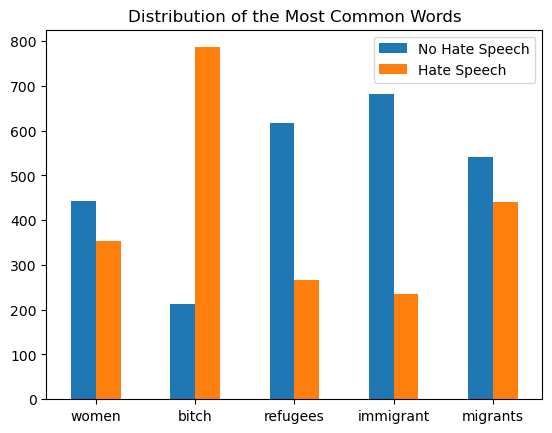

In [ ]:
# bargraph of the most common words
def barchart_words():
  hs = [354, 786, 883-617, 915-681, 983-542]
  nohs = [443, 213, 617, 681, 542]
  index = ['women', 'bitch', 'refugees', 'immigrant', 'migrants']
  df = pd.DataFrame({'No Hate Speech': nohs, 'Hate Speech': hs}, index=index)
  ax = df.plot.bar(rot=0)
  ax.set_title('Distribution of the Most Common Words')
  return ax

barchart_words()

In [ ]:
#@FoxNews, @Refugees, @POTUS, @AnnCoulter and @realDonaldTrump.
print(find_annotation('@FoxNews', EDA))
print(find_annotation('@Refugees', EDA))
print(find_annotation('@POTUS', EDA))
print(find_annotation('@AnnCoulter', EDA))
print(find_annotation('@realDonaldTrump', EDA))

({(1, 0, 1): 7, (1, 0, 0): 11, (0, 0, 0): 9, (1, 1, 0): 6, (1, 1, 1): 1}, 34)
({(0, 0, 0): 56, (1, 0, 0): 1}, 57)
({(1, 0, 1): 31, (0, 0, 0): 12, (1, 1, 1): 4, (1, 0, 0): 23, (1, 1, 0): 4}, 74)
({(1, 0, 1): 6, (0, 0, 0): 25, (1, 0, 0): 4, (1, 1, 0): 43, (1, 1, 1): 10}, 88)
({(1, 0, 0): 73, (0, 0, 0): 79, (1, 0, 1): 104, (1, 1, 1): 14, (1, 1, 0): 14}, 284)


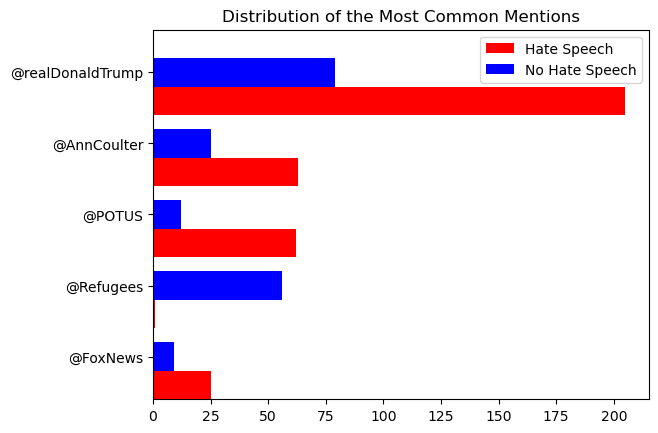

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# bargraph of the most common words - maybe make this horizontal
def barchart_mentions():
  hs = [34-9, 1, 74-12, 63, 205]
  nohs = [9, 56, 12, 25, 79]
  index = ['@FoxNews', '@Refugees', '@POTUS', '@AnnCoulter', '@realDonaldTrump']
  df = pd.DataFrame({'Hate Speech': hs, 'No Hate Speech': nohs}, index=index)
  #ax = df.plot.bar(rot=0)

  df = pd.DataFrame(dict(graph=index, n=hs, m=nohs))

  ind = np.arange(len(df))
  width = 0.4

  fig, ax = plt.subplots()
  ax.barh(ind, df.n, width, color='red', label='Hate Speech')
  ax.barh(ind + width, df.m, width, color='blue', label='No Hate Speech')

  ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
  ax.set_title('Distribution of the Most Common Mentions')
  ax.legend()

  plt.show()


barchart_mentions()

In [ ]:
# #NoDACA, #Trump, #BuildTheWall, #MAGA and #BuildThatWall.
print(find_annotation('#NoDACA', EDA))
print(find_annotation('#Trump', EDA))
print(find_annotation('#BuildTheWall', EDA))
print(find_annotation('#MAGA', EDA))
print(find_annotation('#BuildThatWall', EDA))

({(1, 0, 0): 35, (1, 0, 1): 94, (1, 1, 1): 3, (1, 1, 0): 4, (0, 0, 0): 1}, 137)
({(0, 0, 0): 47, (1, 0, 1): 80, (1, 0, 0): 54, (1, 1, 1): 6, (1, 1, 0): 4}, 191)
({(1, 0, 0): 70, (1, 0, 1): 133, (1, 1, 1): 9, (0, 0, 0): 15, (1, 1, 0): 7}, 234)
({(1, 0, 1): 138, (1, 0, 0): 80, (0, 0, 0): 31, (1, 1, 1): 11, (1, 1, 0): 5}, 265)
({(1, 0, 0): 112, (1, 0, 1): 218, (1, 1, 1): 10, (1, 1, 0): 6}, 346)


<Axes: title={'center': 'Distribution of the Most Common Hashtags'}>

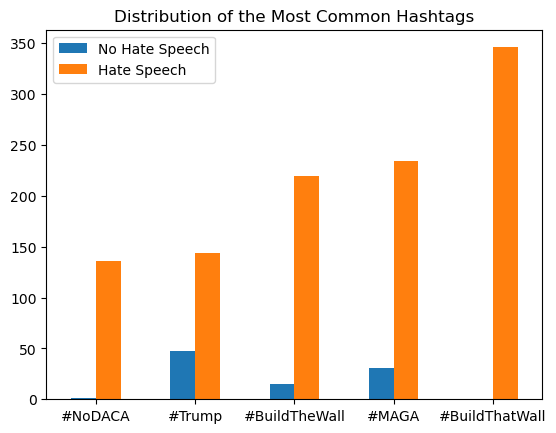

In [ ]:
# bargraph of the most common hashtags
def barchart_hashtags():
  hs = [136, 144, 219, 234, 346]
  nohs = [1, 47, 15, 31, 0]
  index = ['#NoDACA', '#Trump', '#BuildTheWall', '#MAGA', '#BuildThatWall']
  df = pd.DataFrame({'No Hate Speech': nohs, 'Hate Speech': hs}, index=index)
  ax = df.plot.bar(rot=0)
  ax.set_title('Distribution of the Most Common Hashtags')
  return ax

barchart_hashtags()

### Vocabularly Size

In [ ]:
unique_words = set(full_corpus.split())
length = len(unique_words)
print(length)

45527


# Preprocessing Data

## Installing the modules

### Preprocessing using Regex

First we do the ones involving Regex

In [ ]:
import re

#### Removing URLs, Mentions and Hash

In [ ]:
# remove URLs, Mentions and Hash Symbols
def remove_URLs_Mentions_Hash(tweet: str) -> str:
    # remove urls
    tweet = re.sub("http\S+", '', tweet)
    tweet = re.sub("https\S+", '', tweet)
    tweet = re.sub("www\S+", '', tweet)
    # removing mentions '@' and '#' #
    tweet = re.sub(r'\@','', tweet)
    tweet = re.sub(r'\#','', tweet)
    return tweet

remove_URLs_Mentions_Hash("hey http:/kaka/yaays3219e8219821wh #kaka @TheoneWithin")

'hey  kaka TheoneWithin'

#### Removing numbers

In [ ]:
# remvoing numbers
def remove_numbers(tweet: str) -> str:
  tweet = re.sub(r'\d', '', tweet)
  return tweet

remove_numbers("kaka212")

'kaka'

### Preprocessing using String Library

Preprocessing involving string library

#### Removing Punctuation

In [ ]:
# removing punctuation
import string
punctuation = string.punctuation

def remove_punctuation(tweet: str) -> str:
  tweet = re.sub(r'[%s]' % re.escape(string.punctuation), '', tweet)
  return tweet

print(remove_punctuation("kaka in beach. :-)"))
print(punctuation)

kaka in beach 
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Lower Casing

In [ ]:
# lower casing
def lower_case(tweet: str) -> str:
  tweet = tweet.lower()
  return tweet

lower_case('Bsnnaan')

'bsnnaan'

#### Reducing Elongated Characters

In [ ]:
# preprocessing elongated characters
# only for 3 or more chaarcters
def fix_elongation(tweet: str) -> str:
    output = list()
    i = 0
    while i < len(tweet):
        counter = 0
        while (counter + i < len(tweet) - 1) and (tweet[i + counter] == tweet[i + counter + 1]):
            counter += 1
            #print(tweet[i+counter], counter)
        if counter >= 2:
            output.append(tweet[i])
            i += counter
        else:
            output.append(tweet[i])
        i += 1
    return  ''.join(output)

fix_elongation("caaant")

'cant'

### Preprocessing involving nltk library

#### Removing Stop Words

In [ ]:
#remove stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tweet: str) -> str:
  tweet_tokens = word_tokenize(tweet)
  nosw_tweets = [w for w in tweet_tokens if not w in stop_words]
  nosw_tweets = ' '.join(nosw_tweets)
  return nosw_tweets

remove_stopwords('kaka in beach')

'kaka beach'

#### Lemmatising Words

In [ ]:
# lemmatise words
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatise_words(tweet: str) -> str:
  tweet_tokens = word_tokenize(tweet)
  tagged = nltk.pos_tag(tweet_tokens)
  tagged_list = list()
  processed_tweet = list()
  # fixing the tags
  for k in tagged:
    #print(k[0], k[1])
    pair = [k[0], get_wordnet_pos(k[1])]
    tagged_list.append(pair)
  # now we lemmatize
    if get_wordnet_pos(k[1]) is None:
      processed_tweet.append(lemmatizer.lemmatize(pair[0]))
    else:
      processed_tweet.append(lemmatizer.lemmatize(pair[0], pair[1]))
  #print(processed_tweet)
  return ' '.join(processed_tweet)

lemmatise_words("service services serviced")

#get_wordnet_pos("yee")

'service service service'

### Preprocessing involving Ekphrasis

In [ ]:
import ekphrasis

#### Word Segmentation

In [ ]:
# initialise segmenter
from ekphrasis.classes.segmenter import Segmenter
seg = Segmenter(corpus="twitter")
print(seg.segment("smallandinsignificant"))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
small and insignificant


/usr/local/lib/python3.9/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
# initialise spellcorrector
from ekphrasis.classes.spellcorrect import SpellCorrector
sp = SpellCorrector(corpus="twitter")

Reading twitter - 1grams ...


In [ ]:
# segmentation
def segment_words(tweet: str) -> str:
  fixed_tw = seg.segment(tweet)
  return fixed_tw

segment_words("smallandinsignificant")
segment_words("JustCameBackFromTheGym")

'just came back from the gym'

#### Spell Correcting Words

In [ ]:
# spell correction
def word_correction(tweet: str) -> str:
  # NB: SpellCorrector only works on a word by word basis
  word_tokens = tweet.split(' ')
  corrected_words = list()
  for word in word_tokens:
    corrected_words.append(sp.correct(word) + ' ' )
  return ''.join(corrected_words)

word_correction("he was not dorrect with his muwstache")

'he was not correct with his mustache '

#### Expanding Abbreviations

In [ ]:
import re

abbreviations = {
    'lol': 'laughing out loud',
    'lmao': 'laughing my ass off',
    'rofl': 'rolling on the floor laughing',
    'omg': 'oh my god',
    'wtf': 'what the fuck',
    'idk': 'I don\'t know',
    'imo': 'in my opinion',
    'btw': 'by the way',
    'fyi': 'for your information',
    'brb': 'be right back',
    'bff': 'best friends forever',
    'ftw': 'for the win',
    'tbh': 'to be honest',
    'tbt': 'throwback Thursday',
    'yolo': 'you only live once',
    'smh': 'shaking my head',
    'asap': 'as soon as possible',
    'btw': 'by the way',
    'bae': 'before anyone else',
    'atm': 'at the moment',
    'fomo': 'fear of missing out',
    'hmu': 'hit me up',
    'ig': 'Instagram',
    'ig': 'I guess',
    'irl': 'in real life',
    'jk': 'just kidding',
    'nvm': 'never mind',
    'np': 'no problem',
    'omw': 'on my way',
    'tmi': 'too much information',
    'rn': 'right now',
    'wyd': 'what are you doing',
    'rt': 'retweet',
    'dm' : 'direct message',
    'mt': 'modified tweet',
    'ht': 'hat tip',
    'ff' : 'follow friday',
    'icymi' : 'in case you missed it',
    'tl;dr' : 'too long; didn\'t read ',
    'imo' : 'In My Opinion',
    'imho' : 'in my humble opinion',
    'smh' : 'shaking my head',
    'prt':	'partial retweet',
    'mt' :	'modified tweet',
    'prt' :	'please retweet',
    'cc' :	'carbon-copy',
    'cx' :	'correction',
    'em' :	'email marketing',
    'seo' :	'search engine optimization',
    'sroi' :	'social return on investment',
    'sn' :	'social network',
    'yt' :	'youtube',
    'fb' :	'facebook',
    'li' :	'linkedin',
    'sm' :	'social media',
    'smm' :	'social media marketing',
    'ezine' :	'electronic magazine',
    'gr8': 'great',
    'f2f': 'face to face',
    'g9': 'goodnight',
    'h8': 'hate',
    'ily': 'i love you',
    'ily2': 'i love you too',
    'l8': 'late',
    'm8': 'mate',
    'r8': 'rate',
    't2u': 'talk to you',
    'w8': 'wait',
    'y2k': "you're too kind",
}

# function to replace abbreviations in a tweet
def replace_abbreviations_slangs(tweet: str) -> str:
    for word in tweet.split():
        if word.lower() in abbreviations:
            tweet = re.sub(r'\b{}\b'.format(re.escape(word)), abbreviations[word.lower()], tweet, flags=re.IGNORECASE)
    return tweet
replace_abbreviations_slangs('Y2K')

"you're too kind"

## Removing Emoticons

In [ ]:
import re
import pickle

with open('Emoticon.p', 'rb') as fp:
    Emoticon = pickle.load(fp)

def remove_emoticons(text):
    pattern = re.compile(u'(' + u'|'.join(k for k in Emoticon) + u')')
    return pattern.sub(r'', text)

remove_emoticons("Good Morning :-)")

'Good Morning '

## Final Tweet Preprocessing Pipeline

In [ ]:
def preprocessing_pipeline(tweet: str) -> str:
  tweet = remove_URLs_Mentions_Hash(tweet)
  tweet = remove_emoticons(tweet)
  tweet = replace_abbreviations_slangs(tweet)
  tweet = word_correction(tweet)
  tweet = fix_elongation(tweet)
  tweet = remove_punctuation(tweet)
  tweet = lower_case(tweet)
  tweet = segment_words(tweet)
  tweet = remove_numbers(tweet)
  tweet = remove_stopwords(tweet)
  tweet = lemmatise_words(tweet)
  return tweet

preprocessing_pipeline("gr8 talking to you m8")

'great talk mate'

# Trainning Set Transformations

## Preprocessing the Trainning Set

In [ ]:
df2 = df.copy()
df2.drop(["TR", "AG"], axis = 1)

,id,text,HS
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1
1,202,Why would young fighting age men be the vast m...,1
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0
4,205,Orban in Brussels: European leaders are ignori...,0
...,...,...,...
8995,9196,@mmdwriter @JRubinBlogger @BenSasse I am proud...,0
8996,9197,@CheriJacobus Hollywood is complicit in the ra...,0
8997,9198,@amaziah_filani What a fucking cunt I hate see...,1
8998,9199,Hysterical woman like @CoryBooker,0


In [ ]:
df2['text'] = df2['text'].apply(preprocessing_pipeline)

In [ ]:
df2

,id,text,HS,TR,AG
0,201,murray save u many way potus realdonaldtrump l...,1,0,0
1,202,would young fight age men vast majority one es...,1,0,0
2,203,kamala harris illegals jump kid border like ro...,1,0,0
3,204,time early white state lose array problem immi...,0,0,0
4,205,urban brussels european leader ignore people w...,0,0,0
...,...,...,...,...,...
8995,9196,mmd writer jrubinblogger ben sasse proud hyste...,0,0,0
8996,9197,cheri jacob u hollywood complicit rape sexual ...,0,0,0
8997,9198,maziahfilani fuck cunt hate see kid get neglec...,1,1,1
8998,9199,hysterical woman like cory booker,0,0,0


In [ ]:
# save dataframe
df2.to_csv('train_preprocessed.tsv', sep = '\t')

## Loading the Preprocessed Train set

In [ ]:
df2 = pd.read_csv('train_preprocessed.tsv', sep = '\t')

In [ ]:
df2

,Unnamed: 0,id,text,HS,TR,AG
0,0,201,murray save u many way potus realdonaldtrump l...,1,0,0
1,1,202,would young fight age men vast majority one es...,1,0,0
2,2,203,kamala harris illegals jump kid border like ro...,1,0,0
3,3,204,time early white state lose array problem immi...,0,0,0
4,4,205,urban brussels european leader ignore people w...,0,0,0
...,...,...,...,...,...,...
8995,8995,9196,mmd writer jrubinblogger ben sasse proud hyste...,0,0,0
8996,8996,9197,cheri jacob u hollywood complicit rape sexual ...,0,0,0
8997,8997,9198,maziahfilani fuck cunt hate see kid get neglec...,1,1,1
8998,8998,9199,hysterical woman like cory booker,0,0,0


## Splitting Trainning set between Points and Label


In [ ]:
# splitting the trainning data and the labels.
train_X = df2[['text']]
train_X['text'] = train_X['text'].astype('str')
train_X

<ipython-input-3-2dd372dcad8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['text'] = train_X['text'].astype('str')


,text
0,murray save u many way potus realdonaldtrump l...
1,would young fight age men vast majority one es...
2,kamala harris illegals jump kid border like ro...
3,time early white state lose array problem immi...
4,urban brussels european leader ignore people w...
...,...
8995,mmd writer jrubinblogger ben sasse proud hyste...
8996,cheri jacob u hollywood complicit rape sexual ...
8997,maziahfilani fuck cunt hate see kid get neglec...
8998,hysterical woman like cory booker


In [ ]:
train_Y = df2[['HS']]
train_Y

,HS
0,1
1,1
2,1
3,0
4,0
...,...
8995,0
8996,0
8997,1
8998,0


# Model Implementation

## Useful imports for model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
# fitting SVM onto the trainning set
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## 1) Model 1 - Pre Trained Universal Sentence Embedding and SVM.

### Sentence Embedding

In [ ]:
embedder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
# applying sentence embeddings
import tensorflow_hub as hub
import numpy as np

input = [text for text in train_X["text"]]
np_list = np.asarray(input)
tensor_list = tf.convert_to_tensor(np_list)

#embeddings = embed([text for text in train_X["text"]])
embeddings = embedder(tensor_list)

embeddings = np.array(embeddings)

print(train_X.shape)
print(embeddings.shape)
print(embeddings)

(9000, 1)
(9000, 512)
[[-0.01920734 -0.05037557 -0.06133951 ...  0.07157698 -0.08142253
  -0.07066328]
 [-0.05528642 -0.07025849  0.0662753  ...  0.06809834 -0.01347537
  -0.0698311 ]
 [ 0.00625917 -0.06686979 -0.0086604  ...  0.05849302 -0.06149726
  -0.06689758]
 ...
 [ 0.0202865  -0.01944397 -0.02870171 ... -0.04522985 -0.06225675
   0.01376734]
 [ 0.04229641  0.01624859  0.06034963 ...  0.048836    0.02406791
   0.05863392]
 [ 0.00616434  0.00412572  0.01132094 ... -0.0366067  -0.03290899
  -0.01546842]]


the first model we will do is a SVM model. This will essentially be the fermi model.
The model uses a Universal sentence embedding and SVM with RBF.

In [ ]:
train_SVM_X = embeddings

train_SVM_X.shape

(9000, 512)

In [ ]:
# rbf basis
svc_clf = SVC(kernel = "rbf")
svc_clf.fit(train_SVM_X, np.ravel(train_Y))

SVC()

In [ ]:
# getting predicted
svctrain_predict = cross_val_predict(svc_clf, train_SVM_X, np.ravel(train_Y), cv = 5)

In [ ]:
svcreport = classification_report(train_Y, svctrain_predict)
print(svcreport)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5217
           1       0.70      0.67      0.68      3783

    accuracy                           0.74      9000
   macro avg       0.73      0.73      0.73      9000
weighted avg       0.74      0.74      0.74      9000



### 1.2) Optimising the SVM

In [ ]:
# optimising SVM hyperparameters
from sklearn.model_selection import GridSearchCV
SVM_grid = [
    {'kernel': ['linear','rbf', 'sigmoid'], "gamma" : ["scale", "auto"], 'C': [1, 0.1, 0.01, 0.001]},
]

svmcl = SVC()
gridsearchSVC = GridSearchCV(svmcl, SVM_grid, cv = 5, scoring = "accuracy", return_train_score = True)
gridsearchSVC.fit(train_SVM_X, np.ravel(train_Y))

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 0.1, 0.01, 0.001],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# optimising SVM hyperparameters polynomial
from sklearn.model_selection import GridSearchCV
SVM_polygrid = [
    {'kernel': ['poly'], "degree": [2, 3, 4], "gamma" : ["scale", "auto"], 'C': [1, 0.1, 0.01, 0.001]},
]

svmpolycl = SVC()
gridsearchpolySVC = GridSearchCV(svmpolycl, SVM_polygrid, cv = 5, scoring = "accuracy", return_train_score = True)
gridsearchpolySVC.fit(train_SVM_X, np.ravel(train_Y))

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 0.1, 0.01, 0.001], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
print(gridsearchSVC.best_params_)
print(gridsearchpolySVC.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
# optimising best SVM hyperparameters polynomial
from sklearn.model_selection import GridSearchCV
SVM_bestgrid = [
print(gridsearchpolySVC.best_params_)
    {'kernel': ['poly', 'rbf'], "degree": [3], "gamma" : ["scale"], 'C': [1]},
]

svmbestcl = SVC()
gridsearchbestSVC = GridSearchCV(svmbestcl, SVM_bestgrid, cv = 5, scoring = "accuracy", return_train_score = True)
gridsearchbestSVC.fit(train_SVM_X, np.ravel(train_Y))

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'degree': [3], 'gamma': ['scale'],
                          'kernel': ['poly', 'rbf']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
print(gridsearchbestSVC.best_params_)

{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


### 1.3) Trainning best SVM

In [ ]:
# polynomial SVM
best_svc_clf = SVC(kernel = "poly", gamma = 'scale', degree = 3, C = 1.0)
best_svc_clf.fit(train_SVM_X, np.ravel(train_Y))

SVC(kernel='poly')

In [ ]:
# getting predicted
from sklearn.model_selection import cross_val_predict
best_svctrain_predict = cross_val_predict(best_svc_clf, train_SVM_X, np.ravel(train_Y), cv = 5)

In [ ]:
best_svcreport = classification_report(train_Y, best_svctrain_predict)
print(best_svcreport)

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      5217
           1       0.71      0.65      0.68      3783

    accuracy                           0.74      9000
   macro avg       0.74      0.73      0.73      9000
weighted avg       0.74      0.74      0.74      9000



## 2) Model 2 - LSTM RNN Classifier

### 2.1) - Encoding sentences

In [ ]:
#https://github.com/mdabashar/Deep-Learning-Algorithms/blob/master/LSTM%20Hate%20Speech%20Detection.ipynb

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 100000
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(train_X['text']) # updates vocab
xtrain = tokenizer.texts_to_sequences(train_X['text']) # get the matrix of ints
maxlen = max(map(lambda x: len(x),xtrain)) # get the maximum length
xtrain = pad_sequences(xtrain, maxlen=maxlen) # pads the sequences to max length

print(xtrain)

[[   0    0    0 ... 1808  662 1650]
 [   0    0    0 ...   78    5   73]
 [   0    0    0 ...  165  331 6765]
 ...
 [   0    0    0 ...   26 1304  488]
 [   0    0    0 ...    9 1839 1840]
 [   0    0    0 ... 3000  185  122]]


### 2.2) Creating model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Input, Activation
from keras.layers import Embedding
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import Model

def create_lstm_model():
    tweet_input = Input(shape=(maxlen,), dtype='int32')
    #tweet_encoder = Embedding(num_words, 200, weights=[embedding_matrix], input_length=maxlen, trainable=True)(tweet_input)
    tweet_encoder = Embedding(num_words, 200, input_length=maxlen)(tweet_input)
    tweet_encoder = Dropout(0.5)(tweet_encoder)
    merged = LSTM(100)(tweet_encoder)
    merged = Dropout(0.5)(merged)
    merged = Dense(1)(merged)
    output = Activation('sigmoid')(merged)
    model = Model(inputs=[tweet_input], outputs=[output])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    return model

In [ ]:
print(embeddings.shape)

(9000, 512)


In [ ]:
lstm_model = create_lstm_model()
print(lstm_model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 42)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 42, 200)           20000000  
                                                                 
 dropout_10 (Dropout)        (None, 42, 200)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               120400    
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
 activation_4 (Activation)   (None, 1)                 0   

In [ ]:
lstm_model = create_lstm_model()
lstm_model.fit(xtrain, train_Y, epochs=3, batch_size=32, verbose=1)

Epoch 1/3
282/282 [==============================] - 51s 177ms/step - loss: 0.5480 - accuracy: 0.7241
Epoch 2/3
282/282 [==============================] - 50s 178ms/step - loss: 0.3733 - accuracy: 0.8364
Epoch 3/3
282/282 [==============================] - 49s 175ms/step - loss: 0.2504 - accuracy: 0.8996


### 2.3) Evaluating Model

In [ ]:
from sklearn.metrics import classification_report
p = lstm_model.predict(xtrain,verbose=1)
predicted = [int(round(x[0])) for x in p]
actual = train_Y

print(classification_report(actual, rpredicted)

### 2.4) Regularising the model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Input, Activation, BatchNormalization
from keras.layers import Embedding
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import Model
from keras import regularizers

def create_reg_lstm_model():
    tweet_input = Input(shape=(maxlen,), dtype='int32')
    #tweet_encoder = Embedding(num_words, 200, weights=[embedding_matrix], input_length=maxlen, trainable=True)(tweet_input)
    tweet_encoder = Embedding(num_words, 200, input_length=maxlen)(tweet_input)
    tweet_encoder = BatchNormalization()(tweet_encoder)
    tweet_encoder = Dropout(0.5)(tweet_encoder)
    merged = LSTM(100, recurrent_dropout = 0.5, dropout = 0.5, kernel_regularizer = regularizers.l1_l2(l1=1, l2=1))(tweet_encoder) # you can also regularise here!!!
    #merged = LSTM(100, recurrent_dropout=0.5, dropout=0.5, kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01))(tweet_encoder) # you can also regularise here!!!
    merged = BatchNormalization()(merged)
    merged = Dropout(0.5)(merged)
    merged = Dense(1)(merged)
    output = Activation('sigmoid')(merged)
    model = Model(inputs=[tweet_input], outputs=[output])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    return model

rlstm_model = create_reg_lstm_model()
print(rlstm_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 embedding (Embedding)       (None, 42, 200)           20000000  
                                                                 
 batch_normalization (BatchN  (None, 42, 200)          800       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 42, 200)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                             

In [ ]:
def create_ph_model():
    tweet_input = Input(shape=(maxlen,), dtype='int32')
    #tweet_encoder = Embedding(num_words, 200, weights=[embedding_matrix], input_length=maxlen, trainable=True)(tweet_input)
    tweet_encoder = Embedding(num_words, 200, input_length=maxlen)(tweet_input)
    tweet_encoder = Dropout(0.9)(tweet_encoder)
    merged = LSTM(100, recurrent_dropout=0.7, dropout=0.7, kernel_regularizer = regularizers.l1_l2(l1=0.1, l2=0.1))(tweet_encoder) # you can also regularise here!!!
    merged = Dropout(0.9)(merged)
    merged = Dense(1, kernel_regularizer=regularizers.l2(0.1))(merged)
    output = Activation('sigmoid')(merged)
    model = Model(inputs=[tweet_input], outputs=[output])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

place_holder = create_ph_model()

In [ ]:
place_holder.fit(xtrain, train_Y, epochs = 2, batch_size=32, verbose = 1)
print('*'*60)
rlstm_model.fit(xtrain, train_Y, epochs=3, batch_size=32, verbose=1)

Epoch 1/2
282/282 [==============================] - 102s 350ms/step - loss: 53.7852 - accuracy: 0.5712
Epoch 2/2
282/282 [==============================] - 110s 391ms/step - loss: 1.6598 - accuracy: 0.5797
************************************************************
Epoch 1/3
282/282 [==============================] - 101s 357ms/step - loss: 10.5469 - accuracy: 0.7947
Epoch 2/3
282/282 [==============================] - 99s 351ms/step - loss: 10.5049 - accuracy: 0.8117
Epoch 3/3
282/282 [==============================] - 99s 351ms/step - loss: 10.3870 - accuracy: 0.8310


### 2.5) Evaluate Model Performance on train set

In [ ]:
from sklearn.metrics import classification_report
rp = rlstm_model.predict(xtrain,verbose=1)
rpredicted = [int(round(x[0])) for x in rp]
actual = train_Y

print(classification_report(actual, rpredicted))

#ebc = EvaluateBinaryClassification(gnd_truths = actual, predictions = rpredicted)
#print(ebc.get_full_report())

282/282 [==============================] - 6s 20ms/step
              precision    recall  f1-score   support

           0       0.98      0.60      0.74      5217
           1       0.64      0.98      0.77      3783

    accuracy                           0.76      9000
   macro avg       0.81      0.79      0.76      9000
weighted avg       0.84      0.76      0.76      9000



## 3) BERT CNN

### 3.1) Install and import necessary libraries.

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense, Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 3.2) Load the pre-trained BERT model for sentence embedding.



In [ ]:
model = SentenceTransformer('sentence-transformers/LaBSE')

### 3.3) Encode sentences from the dataset using BERT sentence embeddings.

In [ ]:
X = model.encode(train_X['text'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/282 [00:00<?, ?it/s]

### 3.4) Split the data into training and validation sets.



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, train_Y, test_size=0.2, random_state=42)

In [ ]:
X_train_expanded = np.expand_dims(X_train, axis=-1)
X_val_expanded = np.expand_dims(X_val, axis=-1)


### 3.5) Define the CNN Classifier model.

In [ ]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

### 3.6) Create and train the CNN Classifier model.

In [ ]:
from keras.layers import MaxPooling1D

input_shape = (X_train_expanded.shape[1], X_train_expanded.shape[2])
cnn_model = create_cnn_model(input_shape)
cnn_model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
225/225 [==============================] - 25s 106ms/step - loss: 0.6827 - accuracy: 0.5765 - val_loss: 0.6765 - val_accuracy: 0.5889
Epoch 2/10
225/225 [==============================] - 23s 102ms/step - loss: 0.6803 - accuracy: 0.5774 - val_loss: 0.6799 - val_accuracy: 0.5889
Epoch 3/10
225/225 [==============================] - 23s 102ms/step - loss: 0.6786 - accuracy: 0.5774 - val_loss: 0.6738 - val_accuracy: 0.5889
Epoch 4/10
225/225 [==============================] - 23s 103ms/step - loss: 0.6754 - accuracy: 0.5774 - val_loss: 0.6668 - val_accuracy: 0.5889
Epoch 5/10
225/225 [==============================] - 22s 97ms/step - loss: 0.6716 - accuracy: 0.5775 - val_loss: 0.6660 - val_accuracy: 0.5889
Epoch 6/10
225/225 [==============================] - 23s 101ms/step - loss: 0.6697 - accuracy: 0.5778 - val_loss: 0.6621 - val_accuracy: 0.5889
Epoch 7/10
225/225 [==============================] - 24s 107ms/step - loss: 0.6667 - accuracy: 0.5756 - val_loss: 0.6576 - val_acc

### 3.7) Evaluate the CNN Classifier model on the Train Set

In [ ]:
# Prediction and evaluation
# train set
p_train = cnn_model.predict(X_train, verbose=1)
predicted_train = [int(round(x[0])) for x in p_train]
actual_train = y_train

print("Train Set Performance: ")
print(classification_report(actual_train, predicted_train))

p_val = cnn_model.predict(X_val, verbose=1)
predicted_val = [int(round(x[0])) for x in p_val]
actual_val = y_val

print("Validation Performance:")
print(classification_report(actual_val, predicted_val))

225/225 [==============================] - 7s 30ms/step
Train Set Performance: 
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      4157
           1       0.00      0.00      0.00      3043

    accuracy                           0.58      7200
   macro avg       0.29      0.50      0.37      7200
weighted avg       0.33      0.58      0.42      7200

 1/57 [..............................] - ETA: 7s

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


57/57 [==============================] - 2s 28ms/step
Validation Performance:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1060
           1       0.00      0.00      0.00       740

    accuracy                           0.59      1800
   macro avg       0.29      0.50      0.37      1800
weighted avg       0.35      0.59      0.44      1800



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.8) Optimizing

1. adding a Batch Normalization layer

Import BatchNormalization

In [ ]:
from keras.layers import BatchNormalization

Modify the create_cnn_model function to include the BatchNormalization layer

In [ ]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Train and evaluate the modified CNN model

In [ ]:
input_shape = (X_train_expanded.shape[1], X_train_expanded.shape[2])
cnn_model = create_cnn_model(input_shape)
cnn_model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
225/225 [==============================] - 31s 130ms/step - loss: 0.7555 - accuracy: 0.5549 - val_loss: 0.7063 - val_accuracy: 0.4111
Epoch 2/10
225/225 [==============================] - 30s 134ms/step - loss: 0.6677 - accuracy: 0.6028 - val_loss: 0.6808 - val_accuracy: 0.5894
Epoch 3/10
225/225 [==============================] - 30s 133ms/step - loss: 0.6541 - accuracy: 0.6139 - val_loss: 0.6544 - val_accuracy: 0.6561
Epoch 4/10
225/225 [==============================] - 30s 133ms/step - loss: 0.6466 - accuracy: 0.6263 - val_loss: 0.6297 - val_accuracy: 0.6533
Epoch 5/10
225/225 [==============================] - 38s 170ms/step - loss: 0.6432 - accuracy: 0.6303 - val_loss: 0.6252 - val_accuracy: 0.6639
Epoch 6/10
225/225 [==============================] - 30s 134ms/step - loss: 0.6321 - accuracy: 0.6439 - val_loss: 0.6282 - val_accuracy: 0.6461
Epoch 7/10
225/225 [==============================] - 29s 129ms/step - loss: 0.6353 - accuracy: 0.6442 - val_loss: 0.6062 - val_ac

In [ ]:
# Prediction and evaluation
# train set
p_train = cnn_model.predict(X_train, verbose=1)
predicted_train = [int(round(x[0])) for x in p_train]
actual_train = y_train

print("Train Set Performance: ")
print(classification_report(actual_train, predicted_train))

p_val = cnn_model.predict(X_val, verbose=1)
predicted_val = [int(round(x[0])) for x in p_val]
actual_val = y_val

print("Validation Performance:")
print(classification_report(actual_val, predicted_val))

225/225 [==============================] - 7s 30ms/step
Train Set Performance: 
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      4157
           1       0.68      0.59      0.63      3043

    accuracy                           0.71      7200
   macro avg       0.71      0.70      0.70      7200
weighted avg       0.71      0.71      0.71      7200

57/57 [==============================] - 1s 24ms/step
Validation Performance:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1060
           1       0.65      0.55      0.60       740

    accuracy                           0.69      1800
   macro avg       0.68      0.67      0.68      1800
weighted avg       0.69      0.69      0.69      1800



2. using learning rate scheduling

Import the necessary functions and modules

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math


Define a step decay function for learning rate scheduling

In [ ]:
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate


Add the LearningRateScheduler callback in your model training

In [ ]:
input_shape = (X_train_expanded.shape[1], X_train_expanded.shape[2])
cnn_model = create_cnn_model(input_shape)
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
cnn_model.fit(X_train_expanded, y_train, validation_data=(X_val_expanded, y_val), epochs=10, batch_size=32, verbose=1, callbacks=callbacks_list)


Epoch 1/10
225/225 [==============================] - 33s 142ms/step - loss: 0.7428 - accuracy: 0.5550 - val_loss: 0.7049 - val_accuracy: 0.4111 - lr: 0.0010
Epoch 2/10
225/225 [==============================] - 34s 153ms/step - loss: 0.6768 - accuracy: 0.5810 - val_loss: 0.6808 - val_accuracy: 0.5894 - lr: 0.0010
Epoch 3/10
225/225 [==============================] - 31s 138ms/step - loss: 0.6620 - accuracy: 0.5997 - val_loss: 0.6517 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 4/10
225/225 [==============================] - 38s 168ms/step - loss: 0.6570 - accuracy: 0.6106 - val_loss: 0.6348 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 5/10
225/225 [==============================] - 29s 130ms/step - loss: 0.6408 - accuracy: 0.6365 - val_loss: 0.6248 - val_accuracy: 0.6828 - lr: 5.0000e-04
Epoch 6/10
225/225 [==============================] - 29s 129ms/step - loss: 0.6257 - accuracy: 0.6535 - val_loss: 0.6090 - val_accuracy: 0.6694 - lr: 5.0000e-04
Epoch 7/10
225/225 [========================

Train and evaluate the modified CNN model with learning rate scheduling

In [ ]:
# Prediction and evaluation
# train set
p_train = cnn_model.predict(X_train, verbose=1)
predicted_train = [int(round(x[0])) for x in p_train]
actual_train = y_train

print("Train Set Performance: ")
print(classification_report(actual_train, predicted_train))

p_val = cnn_model.predict(X_val, verbose=1)
predicted_val = [int(round(x[0])) for x in p_val]
actual_val = y_val

print("Validation Performance:")
print(classification_report(actual_val, predicted_val))

225/225 [==============================] - 6s 28ms/step
Train Set Performance: 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      4157
           1       0.70      0.59      0.64      3043

    accuracy                           0.72      7200
   macro avg       0.72      0.70      0.71      7200
weighted avg       0.72      0.72      0.72      7200

57/57 [==============================] - 1s 23ms/step
Validation Performance:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1060
           1       0.63      0.53      0.57       740

    accuracy                           0.68      1800
   macro avg       0.66      0.65      0.66      1800
weighted avg       0.67      0.68      0.67      1800



# Dev Set - Evaluation

## 0) Preparing Dev Set

### 0.1) Loading Dev Set

We use the dev set to see the evaluation scores.

In [ ]:
dev = pd.read_table("dev_en.tsv")

In [ ]:
dev

,id,text,HS,TR,AG
0,18201,I swear I’m getting to places just in the nick...,0,0,0
1,18202,I’m an immigrant — and Trump is right on immig...,0,0,0
2,18203,#IllegalImmigrants #IllegalAliens #ElectoralSy...,1,0,1
3,18204,@DRUDGE_REPORT We have our own invasion issues...,1,0,1
4,18205,Worker Charged With Sexually Molesting Eight C...,0,0,0
...,...,...,...,...,...
995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,0,0
996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1,1,1
997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0,0,0
998,19199,I hate bitches who talk about niggaz with kids...,1,0,1


### 0.2) Preprocessing Dev Set

In [ ]:
# processing the dev set
dev['text'] = dev['text'].apply(preprocessing_pipeline)

In [ ]:
# save dataframe
dev.to_csv('dev_preprocessed.tsv', sep = '\t')

### 0.3) Loading Preprocessed dev set

In [ ]:
dev = pd.read_table("dev_preprocessed.tsv")

In [ ]:
dev

,Unnamed: 0,id,text,HS,TR,AG
0,0,18201,swear get place nick time exhaust samschulman ...,0,0,0
1,1,18202,immigrant trump right immigration give insight...,0,0,0
2,2,18203,illegal immigrant illegalaliens electoral syst...,1,0,1
3,3,18204,drudge report invasion issue mexican buildthat...,1,0,1
4,4,18205,worker charge sexually molest right child immi...,0,0,0
...,...,...,...,...,...,...
995,995,19196,nvers unfollowed fuck pussy,0,0,0
996,996,19197,dan reynolds stfu bitch make satanic music ill...,1,1,1
997,997,19198,money fellow white chick let tell need shut fu...,0,0,0
998,998,19199,hate bitch talk niggaz kid everybody cant find...,1,0,1


### 0.4) Dev Set Transformations

In [ ]:
dev_X = dev[['text']]
dev_Y = dev[['HS']]

In [ ]:
dev_X['text'] = dev_X['text'].astype("str")

<ipython-input-28-b2b10b709135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_X['text'] = dev_X['text'].astype("str")


In [ ]:
dev_X

,text
0,swear get place nick time exhaust samschulman ...
1,immigrant trump right immigration give insight...
2,illegal immigrant illegalaliens electoral syst...
3,drudge report invasion issue mexican buildthat...
4,worker charge sexually molest right child immi...
...,...
995,nvers unfollowed fuck pussy
996,dan reynolds stfu bitch make satanic music ill...
997,money fellow white chick let tell need shut fu...
998,hate bitch talk niggaz kid everybody cant find...


In [ ]:
dev_Y

,HS
0,0
1,0
2,1
3,1
4,0
...,...
995,0
996,1
997,0
998,1


## 1) Evaluating Universal Embedding and SVM

In [ ]:
embedder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# applying sentence embeddings
input = [text for text in dev_X["text"]]
np_list = np.asarray(input)
tensor_list = tf.convert_to_tensor(np_list)

dev_embeddings = embedder(tensor_list)

dev_embeddings = np.array(dev_embeddings)

In [ ]:
svc_pdev = best_svc_clf.predict(dev_embeddings)
actual_dev = dev_Y

print(classification_report(actual_dev, svc_pdev))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       573
           1       0.71      0.70      0.71       427

    accuracy                           0.75      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.75      0.75      0.75      1000



## 2) Evaluating RNN LSTM

In [ ]:
# Encodings
xdev = tokenizer.texts_to_sequences(dev_X['text']) # get the matrix of ints
maxlen = max(map(lambda x: len(x),xtrain)) # get the maximum length
xdev = pad_sequences(xdev, maxlen=maxlen) # pads the sequences to max length
print(xdev)

[[   0    0    0 ... 2967    8 3299]
 [   0    0    0 ...   55 6038  190]
 [   0    0    0 ... 1666 1525  329]
 ...
 [   0    0    0 ... 1326    3   99]
 [   0    0    0 ... 6448  236   37]
 [   0    0    0 ...  238   28  703]]


In [ ]:
pdev = rlstm_model.predict(xdev,verbose=1)
rpredicted_dev = [int(round(x[0])) for x in pdev]
actual_dev = dev_Y

print(classification_report(actual_dev, rpredicted_dev))

32/32 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.87      0.39      0.54       573
           1       0.53      0.92      0.67       427

    accuracy                           0.62      1000
   macro avg       0.70      0.66      0.60      1000
weighted avg       0.72      0.62      0.59      1000



## 3) Evaluating BERT CNN

### 3.1) Preparing Dev Set

In [ ]:
X_dev = model.encode(dev['text'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
y_dev = dev['HS'].astype(int)

In [ ]:
X_dev_expanded = np.expand_dims(X_dev, axis = -1)

### 3.2) Predict and Evaluate

In [ ]:
p_dev = cnn_model.predict(X_dev_expanded, verbose=1)
predicted_dev = [int(round(x[0])) for x in p_dev]
actual_dev = y_dev

32/32 [==============================] - 1s 25ms/step


In [ ]:
print(classification_report(actual_dev, predicted_dev))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       573
           1       0.54      0.49      0.52       427

    accuracy                           0.61      1000
   macro avg       0.60      0.59      0.59      1000
weighted avg       0.60      0.61      0.60      1000



# Error Analysis

## Tweets to test against

In [ ]:
tweet1 = '@annCoulter uses a hoe in the lawn'
tweet2 = 'refugees are horrible people, they smell :('

## 1) SVM Prediction

In [ ]:
def svm_predict(text: str):
  text = preprocessing_pipeline(text)
  text = np.asarray([text])
  df = pd.DataFrame(text, columns = ['text'])
  df['text'] = df['text'].astype('str')
  input = [text for text in df["text"]]
  input = np.asarray(input)
  tensor_list = tf.convert_to_tensor(np_list)
  embeddings = embedder(tensor_list)
  predicted = best_svc_clf.predict(embeddings)
  #print(predicted)
  return predicted[0]

print(svm_predict(tweet1))
print(svm_predict(tweet2))

1
1


## 2) RNN LSTM prediction

In [ ]:
def lstm_predict(text: str):
  text = preprocessing_pipeline(text)
  text = np.asarray([text])
  df = pd.DataFrame(text, columns = ['text'])
  df['text'] = df['text'].astype('str')
  input = tokenizer.texts_to_sequences(df['text'].values)
  input = pad_sequences(input, maxlen=maxlen)
  p = rlstm_model.predict(input)
  predicted = [int(round(x[0])) for x in p]
  return predicted[0]

print(lstm_predict(tweet1))
print(lstm_predict(tweet2))

1/1 [==============================] - 0s 39ms/step
1
1/1 [==============================] - 0s 53ms/step
1


## 3) BERT CNN Prediction

In [ ]:
def cnn_predict(text: str):
  text = preprocessing_pipeline(text)
  text = np.asarray([text])
  df = pd.DataFrame(text, columns = ['text'])
  df['text'] = df['text'].astype('str')
  input = model.encode(df['text'].tolist(), show_progress_bar=True)
  input = np.expand_dims(input, axis = -1)
  p = cnn_model.predict(input)
  predicted = [int(round(x[0])) for x in p]
  #print(predicted)
  return predicted[0]

print(cnn_predict(tweet1))
print(cnn_predict(tweet2))
print(cnn_predict(tweet3))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step
1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step
0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step
1


# Final Classifications

## 0) Preparing Test Set

### 0.1) Load Test Set

In [ ]:
test_set = pd.read_table("test_en.tsv")

In [ ]:
columns = ["id", "text", "HS", "TS", "AG"]
data = np.concatenate([[test_set.columns], test_set.values])
# concatenating them into one
test_set = pd.DataFrame(data, columns = columns)

In [ ]:
test_set

,id,text,HS,TS,AG
0,31568,"Bro is a bitch, fucking cunt https://t.co/dQ8J...",0,0.1,0.2
1,30734,I'm rewatching Breaking Bad & I could see why ...,1,1,0
2,31227,@charliekirk11 @asia742 364 down only about 12...,0,0,0
3,31224,>Harasses women and calls them bitch and crabb...,0,0,0
4,31139,"Bitch you ain't gotta call my phone, matter fa...",0,0,0
...,...,...,...,...,...
2966,34170,Fanna start traveling bitch. Haha you hoes can...,1,1,0
2967,33757,"Do something about this immediately, @realDona...",1,0,1
2968,34470,If I trick a bitch and let her think I'm Obama...,1,0,1
2969,33014,#stopimmigration#banislam#Merkelmussweg #FuckE...,1,0,1


### 0.2) Preprocessing Test Set

In [ ]:
# preparing the test set
test_set['text'] = test_set['text'].apply(preprocessing_pipeline)

#print(X_preped)

### 0.3) Loading preprocessed test set

In [ ]:
test_set = pd.read_table('test_preprocessed.tsv')
test_set

,Unnamed: 0,id,text,HS,TS,AG
0,0,31568,bro bitch fucking cunt,0,0.1,0.2
1,1,30734,watch breaking could see hated bitch first tim...,1,1.0,0.0
2,2,31227,charlie kirk asia gobuildthatwall,0,0.0,0.0
3,3,31224,harasses woman call bitch crabby block play vi...,0,0.0,0.0
4,4,31139,bitch aint get ta call phone matter fact hoe l...,0,0.0,0.0
...,...,...,...,...,...,...
2966,2966,34170,wan na start travel bitch haha hoe cant,1,1.0,0.0
2967,2967,33757,something immediately realdonaldtrump national...,1,0.0,1.0
2968,2968,34470,trick bitch let think obama fuck rape,1,0.0,1.0
2969,2969,33014,stop immigration ban islam merkel mus weg fuck...,1,0.0,1.0


### 0.3) Test Set Tranformations

In [ ]:
test_X = test_set[["text"]]
#test_X_embedding = embed_sentences(test_X)
test_X['text'] = test_X['text'].astype('str')
test_X

<ipython-input-12-96b2e269ba82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['text'] = test_X['text'].astype('str')


,text
0,bro bitch fucking cunt
1,watch breaking could see hated bitch first tim...
2,charlie kirk asia gobuildthatwall
3,harasses woman call bitch crabby block play vi...
4,bitch aint get ta call phone matter fact hoe l...
...,...
2966,wan na start travel bitch haha hoe cant
2967,something immediately realdonaldtrump national...
2968,trick bitch let think obama fuck rape
2969,stop immigration ban islam merkel mus weg fuck...


In [ ]:
test_Y = test_set[["HS"]]
test_Y = test_Y.astype(int)
test_Y.dtypes

HS    int64
dtype: object

## 1) SVM

In [ ]:
embedder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# applying sentence embeddings
input = [text for text in test_X["text"]]
np_list = np.asarray(input)
tensor_list = tf.convert_to_tensor(np_list)

test_X_embedding = embedder(tensor_list)

test_X_embedding = np.array(test_X_embedding)

In [ ]:
from sklearn.metrics import classification_report
y_predSVC = best_svc_clf.predict(test_X_embedding)
classification_svc = classification_report(test_Y, y_predSVC)

print(classification_svc)

              precision    recall  f1-score   support

           0       0.77      0.29      0.42      1719
           1       0.47      0.88      0.62      1252

    accuracy                           0.54      2971
   macro avg       0.62      0.59      0.52      2971
weighted avg       0.64      0.54      0.50      2971



## 2) LSTM RNN

In [ ]:
xtest = tokenizer.texts_to_sequences(test_X['text'].values)
xtest = pad_sequences(xtest, maxlen=maxlen)

In [ ]:
p = rlstm_model.predict(xtest,verbose=1)
predicted = [int(round(x[0])) for x in p]
actual = test_Y.values
print(classification_report(actual, predicted))

93/93 [==============================] - 3s 27ms/step
              precision    recall  f1-score   support

           0       0.78      0.03      0.05      1719
           1       0.43      0.99      0.60      1252

    accuracy                           0.43      2971
   macro avg       0.60      0.51      0.33      2971
weighted avg       0.63      0.43      0.28      2971



## 3) BERT CNN

In [ ]:
test_X_encodings = model.encode(test_X['text'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

In [ ]:
test_Y = test_Y.astype(int)

In [ ]:
test_X_expanded = np.expand_dims(test_X_encodings, axis = -1)

### 3.2) Predict and Evaluate

In [ ]:
cnn_testp = cnn_model.predict(test_X_expanded, verbose=1)
predicted_test = [int(round(x[0])) for x in cnn_testp]

93/93 [==============================] - 1s 7ms/step


In [ ]:
print(classification_report(test_Y, predicted_test))

              precision    recall  f1-score   support

           0       0.64      0.50      0.57      1719
           1       0.48      0.62      0.54      1252

    accuracy                           0.55      2971
   macro avg       0.56      0.56      0.55      2971
weighted avg       0.57      0.55      0.55      2971

